In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torchvision

%matplotlib inline

In [2]:
data_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
data_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


Text(0.5, 0, 'label: 6')

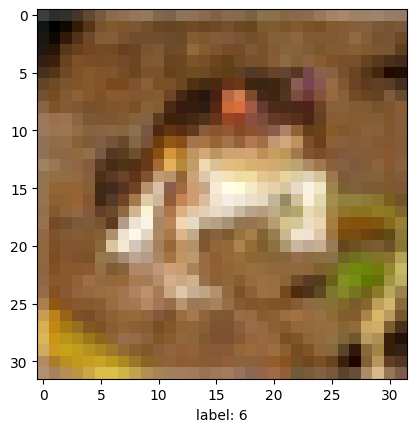

In [3]:
image, label = data_train[0]
plt.imshow(image)
plt.xlabel(f"label: {label}")

Text(0.5, 0, 'label: 3')

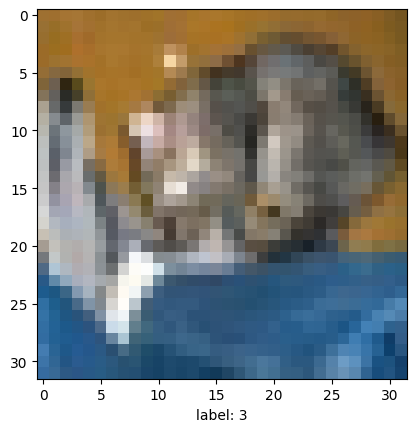

In [4]:
image, label = data_test[0]
plt.imshow(image)
plt.xlabel(f"label: {label}")

In [5]:
from torchvision.transforms import ToTensor

In [6]:
data_train = torchvision.datasets.CIFAR10(root='./data', train=True, transform=ToTensor())
data_test = torchvision.datasets.CIFAR10(root='./data', train=False, transform=ToTensor())

In [7]:
loader_train = DataLoader(dataset=data_train, batch_size=64, shuffle=True)
loader_test = DataLoader(dataset=data_test, batch_size=64, shuffle=True)

In [15]:
for image, label in loader_train:
  print(f"image.shape: {image.shape}")
  print(f"label.shape: {label.shape}")
  break

image.shape: torch.Size([64, 3, 32, 32])
label.shape: torch.Size([64])


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [16]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fully_connected1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
    self.fully_connected2 = nn.Linear(in_features=120, out_features=84)
    self.fully_connected3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1) # Flattens all dimensions except batch

    x = F.relu(self.fully_connected1(x))
    x = F.relu(self.fully_connected2(x))
    x = self.fully_connected3(x)
    return x

In [11]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fully_connected1): Linear(in_features=400, out_features=120, bias=True)
  (fully_connected2): Linear(in_features=120, out_features=84, bias=True)
  (fully_connected3): Linear(in_features=84, out_features=10, bias=True)
)


In [12]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(20):

  running_loss = 0.0
  for i, data in enumerate(loader_train, start=0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('loss: ', running_loss)

print("Finished training!")

loss:  1801.5344724655151
loss:  1800.2011559009552
loss:  1798.7358796596527
loss:  1793.0199882984161
loss:  1727.8383412361145
loss:  1600.097719669342
loss:  1508.4285155534744
loss:  1438.3232394456863
loss:  1362.3670667409897
loss:  1300.8921412229538
loss:  1240.1053932905197
loss:  1199.261031985283
loss:  1176.7001445293427
loss:  1152.9185982942581
loss:  1136.5947525501251
loss:  1118.707602739334
loss:  1098.1014845371246
loss:  1081.6602330207825
loss:  1062.1512901186943
loss:  1042.8547654747963
Finished training!


In [14]:
correct = 0
total = 0

with torch.inference_mode():
  for data in loader_test:
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print("The total accuracy of the network over the 10,000 images: ", correct/total * 100)

The total accuracy of the network over the 10,000 images:  52.470000000000006
